In [1]:
from IPython.display import display
from vdom.helpers import h1, p, img, div, b, li, ul, h2, h3, h4, h5, a
from IPython.display import display, HTML

with open ("custom.css", "r") as myfile:
    custom_css = myfile.read().replace('\n', '')

title = '<h1>Olympic Games Analysis</h1>'
indexes = ({1: {'name': {'Introduction'}},
            2: {'name': {'Requirements'}},
            3: {'name': {'Data Cleaning'}},
            4: {'name': {'Male Analysis'}},
            5: {'name': {'Physique', 'Age', 'Winning Density based on physique'}},
            6: {'name': {'Female Analysis'}},
            7: {'name': {'Physique', 'Age', 'Winning Density based on physique'}},
            8: {'name': {'Gender Gap'}},
            9: {'name': {'Geographic Analysis'}},
            })
          
links =   ({1: {'link': {'#introduction'}},
            2: {'link': {'#requirements'}},
            3: {'link': {'#data_cleaning'}},
            4: {'link': {'#male_analysis'}},
            5: {'link': {'#physique_male', '#age_male', '#winning_male_density_physique'}},
            6: {'link': {'#female_analysis'}},
            7: {'link': {'#physique_female', '#age_female', '#winning_female_density_physique'}},
            8: {'link': {'#gender_gap'}},
            9: {'link': {'#geographic_analysis'}},
            })


def listIndex(indexes):
    html = custom_css
    html += title
    html += '<img src="img/olympics-animation.jpg">'
    html += '<ul class="unstyled">'
    
    for x in range(1, 9):
        try:
        
            index_len = len(indexes[x]['name'])
            if index_len > 1:
                html += '<ul>'
                pass
            for i, j in zip(indexes[x]['name'], links[x]['link']):
                html += '<li><a href="' + j + '">' + i + '</a></li>'
            if index_len > 1:
                html += '</ul>'
                pass
        except Exception:
            break
    html += '</ul>'
    
    return html

display(HTML(listIndex(indexes)))

<h1> Requirements </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:

# Cumulative distribution function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    print(y)
    return x, y

# Calculate min and max of the data
def minmax(data):
    min_val = min(data)
    max_val = max(data)

    return (min_val, max_val)

# Calculate Variance and Standart Deviation

def varstd(data):
    variance = np.var(data)
    standart_dev = np.std(data)
    return (variance, standart_dev)

In [50]:
import glob
csv_files = glob.glob('datasets/*.csv')
dataset = pd.read_csv(csv_files[0])

print(csv_files)
dataset.sample(5)

['datasets\\athlete_events.csv', 'datasets\\noc_regions.csv']


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
73963,37584,Tadashi Fukushima,M,28.0,160.0,54.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Equestrianism,"Equestrianism Mixed Jumping, Team",NaN
91106,46176,Martin Clifford Harris,M,23.0,201.0,92.0,Great Britain,GBR,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Men's 100 metres Backstroke,NaN
125271,63214,Olga Ivanovna Kotlyarova,F,20.0,180.0,66.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,NaN
214686,107787,Eltjo Marinus Jan Schutter,M,23.0,191.0,78.0,Netherlands,NED,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Decathlon,NaN
168561,84715,Andris Naudus,M,25.0,183.0,78.0,Latvia,LAT,2000 Summer,2000,Summer,Sydney,Cycling,"Cycling Men's Road Race, Individual",NaN


In [51]:
dataset.columns = dataset.columns.str.lower()
print(dataset.info())
print(dataset.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
id        271116 non-null int64
name      271116 non-null object
sex       271116 non-null object
age       261642 non-null float64
height    210945 non-null float64
weight    208241 non-null float64
team      271116 non-null object
noc       271116 non-null object
games     271116 non-null object
year      271116 non-null int64
season    271116 non-null object
city      271116 non-null object
sport     271116 non-null object
event     271116 non-null object
medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None
Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')


In [52]:
# Transform data into categories
dataset[['sex', 'noc', 'medal', 'team']] = dataset[['sex', 'noc', 'medal', 'team']].astype('category')

# Transform numeric data, and removing all strings
df = dataset[['age', 'height', 'weight', 'year']]

df = df.apply( pd.to_numeric, errors='coerce' )
dataset[['age', 'height', 'weight', 'year']] = df
# Remove duplicates
dataset = dataset.drop_duplicates()
print(dataset.info())
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
id        269731 non-null int64
name      269731 non-null object
sex       269731 non-null category
age       260416 non-null float64
height    210917 non-null float64
weight    208204 non-null float64
team      269731 non-null category
noc       269731 non-null category
games     269731 non-null object
year      269731 non-null int64
season    269731 non-null object
city      269731 non-null object
sport     269731 non-null object
event     269731 non-null object
medal     39772 non-null category
dtypes: category(4), float64(3), int64(2), object(6)
memory usage: 26.3+ MB
None


,id,age,height,weight,year
count,269731.000000,260416.000000,210917.000000,208204.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.163869,10.518507,14.349027,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,21.000000,168.000000,60.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [53]:
print('Before data regularization')
print(dataset[['age', 'height', 'weight', 'year']].isnull().sum())

columns = ['age', 'height', 'weight', 'year']
for column in columns:
    column_mean = dataset[column].mean()
    dataset[column] = dataset[column].fillna(column_mean)
    
print('\nAfter data regularization')
print(dataset[['age', 'height', 'weight', 'year']].isnull().sum())

Before data regularization
age        9315
height    58814
weight    61527
year          0
dtype: int64

After data regularization
age       0
height    0
weight    0
year      0
dtype: int64


In [59]:
columns = df.columns
for column in columns:
    min_val, max_val = minmax(df[column])
    variance, standart_dev = varstd(df[column])
    print("Min ", column, min_val, "Max ", max_val, "Range: ", max_val - min_val, "Variance: ", variance, "Standart Deviation: ",
         standart_dev)

Min  age 10.0 Max  97.0 Range:  87.0 Variance:  40.87746406981645 Standart Deviation:  6.393548628877116
Min  height 127.0 Max  226.0 Range:  99.0 Variance:  110.63752304227901 Standart Deviation:  10.518437290884945
Min  weight 25.0 Max  214.0 Range:  189.0 Variance:  205.864689298862 Standart Deviation:  14.347985548461567
Min  year 1896 Max  2016 Range:  120 Variance:  892.6696004812078 Standart Deviation:  29.877576884366103


(269731,)
[3.70739737e-06 7.41479474e-06 1.11221921e-05 ... 9.99992585e-01
 9.99996293e-01 1.00000000e+00]
[3.70739737e-06 7.41479474e-06 1.11221921e-05 ... 9.99992585e-01
 9.99996293e-01 1.00000000e+00]
[3.70739737e-06 7.41479474e-06 1.11221921e-05 ... 9.99992585e-01
 9.99996293e-01 1.00000000e+00]


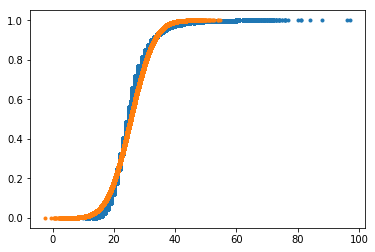

In [55]:
%matplotlib inline
import numpy as np
mu = np.mean(dataset['age'])
sigma = np.std(dataset['age'])
shape = dataset['age'].shape
print(shape)
testing_set = np.random.normal(mu, sigma, shape[0])
x_text, y_test = ecdf(testing_set)
x_text, y_test = ecdf(testing_set)
x, y = ecdf(dataset['age'])
plt.plot(x, y, linestyle='none', marker='.')
plt.plot(x_text, y_test, linestyle='none', marker='.')

In [56]:
dataset.isnull().sum()

id             0
name           0
sex            0
age            0
height         0
weight         0
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     229959
dtype: int64

In [57]:
print('Number of rows: ' + str(dataset.shape[0]))
print('Number of columns: ' + str(dataset.shape[1]))

Number of rows: 269731
Number of columns: 15


<h1> Frequency of Country Participation and Sport Activity </h1>

In [25]:
dataset.noc.value_counts(dropna=False).head()

USA    18604
FRA    12551
GBR    12115
ITA    10668
GER     9734
Name: noc, dtype: int64

In [26]:
dataset.sport.value_counts(dropna=False).head()

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10827
Name: sport, dtype: int64

<h1>Tidy Data</h1>

In [13]:
athlete_df = dataset[['name', 'team', 'noc']]

athlete_df = pd.melt(frame=athlete_df, id_vars='name', value_vars=['team', 'noc'], var_name='type', value_name='result')
athlete_df.head(5)

,name,type,result
0,A Dijiang,team,China
1,A Lamusi,team,China
2,Gunnar Nielsen Aaby,team,Denmark
3,Edgar Lindenau Aabye,team,Denmark/Sweden
4,Christine Jacoba Aaftink,team,Netherlands
